In [51]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [52]:
df = pd.read_csv('E:\Advanced_Regression_\second_env\Scripts\\train (2).csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13944\1512168713.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('E:\Advanced_Regression_\second_env\Scripts\\train (2).csv')


##  **Housing advanced regression dataset is a big data problem it consist of 81 input features{Columns} and around 1400 rows , means this dataset have the curse of dimensionality.**
##  To Train a Regression model on this we have to decrease columns.



### Workflow

### Step-1 
#### --> Check Duplicate Columns , it's a common trait that sometimes high column dataset contains duplicate Columns. IF yes then we drop those columns

### Step-2
#### --> Missing value imputation , if any column contains missing value more than or equal to 50% then we drop that columns. 
####  -> Numerical data filled by their respective mean value 
####  -> Categrical data filled by Most frequent value

### Step-3
#### --> Chi-Square test -> selecting best categorical cols

### Step-4
#### --> Anova test -> Selecting best numerical cols

### Step-5
#### --> Dtypes correction

### Step-6
#### -->  Custom Ordinal Encoding 
 - Example-> column 'A' have values 'Yes' , 'No' , 'Other' 
 - f(X)={'Yes','No','Other'}
 - f(X)-->Encoder-->f(X') {in encoder we assign a numerical value to that respective category} eg--> 'Yes'=1
 - Then, we calcuate ***corelation of f(X') with target column*** , for every possible value form which we choose the best one.

### Step-7
#### --> Outlier handling + visualizing distribution

### Step-8
#### --> *Models*
 - **Linear Regression**
 - **Random Forest**
 - **Gradient Forest**
 - **XGBoost**

### Step-9
#### --> Hyperparameter Tuning of best models using ***OPTUNA***

### Step-10
#### --> Groupping Best Models  
 - Votting Ensemble
 - Stacking Ensemble


## Checking Duplicates Columns

In [53]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [54]:
duplicate_cols = get_duplicate_columns(df)

In [55]:
duplicate_cols

{}

## Missing value

In [56]:
class missing:
  def __init__(self,df):
    self.df = df
    self.cat_col=[]
    self.num_col=[]

  def fit(self):
    a = self.df.isnull().sum()
    a = a[a>0]

    b = {k: v for k, v in zip(a.index,a.values)}
    selected_cols = list(b.keys())


    for i in b.keys():
      if b[i] > self.df[i].shape[0]/2:
       self.df.drop(columns=i,inplace=True)
      else:
        temp_df = self.df[i]
        if temp_df.dtype in ['int64','float64']:
          self.num_col.append(i)
        else:
          self.cat_col.append(i)

    return self

  def transform(self):
    simp = SimpleImputer()
    for i in self.num_col:
      temp_num = simp.fit_transform(self.df[i].values.reshape(-1,1))
      temp_num = pd.Series(temp_num.reshape(self.df[i].shape))
      if temp_num.isnull().sum() == 0:
        df[i] = temp_num
      else:
        print('not_success_completely')

    simp1 = SimpleImputer(strategy='most_frequent')
    for i in self.cat_col:
      temp_cat = simp1.fit_transform(self.df[i].values.reshape(-1,1))
      temp_cat = pd.Series(temp_cat.reshape(self.df[i].shape))
      if temp_cat.isnull().sum() == 0:
        df[i] = temp_cat
      else:
        print('not_success_completely')

In [57]:
misser = missing(df)
misser.fit()
misser.transform()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [59]:
# Let's seperate categorical and numerical data
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object','category'])


In [60]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [61]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

## Anova TEST

In [62]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif,k=37).fit(df_num.drop(columns='SalePrice'),df_num['SalePrice'])

In [63]:
columns = df_num.drop(columns='SalePrice').columns[sel.get_support()]

In [64]:
columns.shape , df_num.shape

((37,), (1460, 38))

In [65]:
# No column deducted { one missing column is target column }

## Chi-Square Test

In [66]:
from scipy.stats import chi2_contingency

<Axes: >

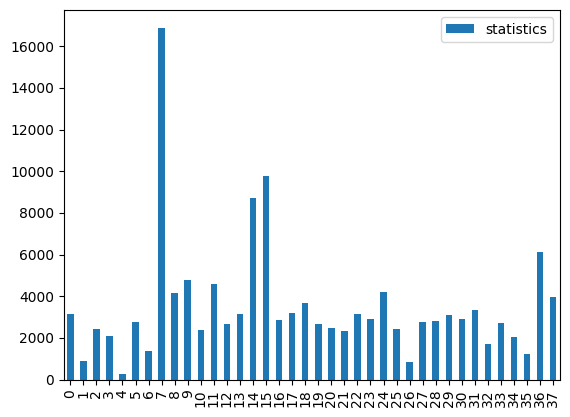

In [67]:
score = []
for feature in df_cat.columns:
    ct = pd.crosstab(df['SalePrice'],df_cat[feature])

    #chi test
    p_value = chi2_contingency(ct)
    score.append(p_value)

data = {
    "statistics":[res.statistic for res in score],
    "pvalue":[res.pvalue for res in score]
}
temp_df = pd.DataFrame(data)
temp_df.plot(kind='bar',y="statistics")

<Axes: >

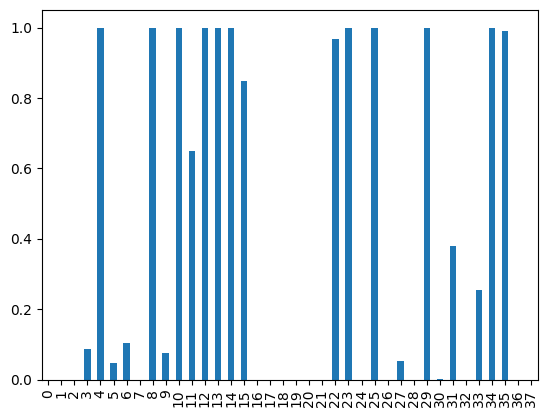

In [68]:
temp_df['pvalue'].plot(kind='bar')

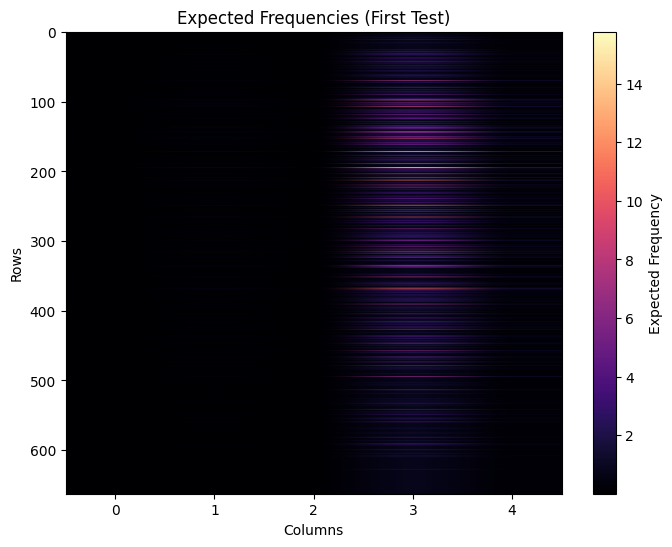

In [69]:
import matplotlib.pyplot as plt

# Assuming 'score' is a list of Chi2ContingencyResult objects from scipy.stats.chi2_contingency
# and each has an attribute 'expected_freq'
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

# Visualize the expected frequencies matrix for the first test result in 'score'
plt.imshow(score[0].expected_freq, aspect='auto', cmap='magma')
plt.colorbar(label='Expected Frequency')
plt.title("Expected Frequencies (First Test)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [70]:
# Selected thoso columns that have pvalue>0.05

columns_name = df_cat.columns
drop_cols = [col for col,p in zip(columns_name,temp_df['pvalue']) if p>0.05 ]

In [71]:
df_cat = df_cat.drop(columns=drop_cols)

In [72]:
df_cat.shape

(1460, 18)

In [73]:
columns=[]

cat_cols = df_cat.columns
num_cols = df_num.columns
for i in cat_cols:
    columns.append(i)

for i in num_cols:
    columns.append(i)

In [74]:
# cat + num --> main df
main_df = pd.DataFrame(np.hstack([df_cat,df_num]),columns=columns)

In [75]:
main_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   Neighborhood   1460 non-null   object
 5   ExterQual      1460 non-null   object
 6   ExterCond      1460 non-null   object
 7   Foundation     1460 non-null   object
 8   BsmtQual       1460 non-null   object
 9   BsmtCond       1460 non-null   object
 10  BsmtExposure   1460 non-null   object
 11  Heating        1460 non-null   object
 12  CentralAir     1460 non-null   object
 13  KitchenQual    1460 non-null   object
 14  FireplaceQu    1460 non-null   object
 15  GarageFinish   1460 non-null   object
 16  SaleType       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  Id             1460 non-null

In [76]:
# Remove extra id col
main_df.drop(columns='Id',inplace=True)


In [77]:
main_df.head()

,MSZoning,Street,LotShape,LotConfig,Neighborhood,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,FireplaceQu,GarageFinish,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Inside,CollgCr,Gd,TA,PConc,Gd,TA,No,GasA,Y,Gd,Gd,RFn,WD,Normal,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,RL,Pave,Reg,FR2,Veenker,TA,TA,CBlock,Gd,TA,Gd,GasA,Y,TA,TA,RFn,WD,Normal,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,RL,Pave,IR1,Inside,CollgCr,Gd,TA,PConc,Gd,TA,Mn,GasA,Y,Gd,TA,RFn,WD,Normal,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,RL,Pave,IR1,Corner,Crawfor,TA,TA,BrkTil,TA,Gd,No,GasA,Y,Gd,Gd,Unf,WD,Abnorml,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,RL,Pave,IR1,FR2,NoRidge,Gd,TA,PConc,Gd,TA,Av,GasA,Y,Gd,TA,RFn,WD,Normal,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


## Let's fix dtypes of our columns

In [78]:
change_to_num = main_df.iloc[:,18:]
for i in change_to_num:
    main_df[i] = pd.to_numeric(main_df[i])

## Ordinal Encoding

In [79]:
def encoder(df,Target_name):
    df_cat = df.select_dtypes(include=['object','category'])
    for a in df_cat.columns:
        itr = list(range(df_cat[a].value_counts().shape[0]))
        itr_di = {}
        for b in range(len(itr)):
            for c in range(len(itr)-1):
                itr[c],itr[c+1] = itr[c+1],itr[c]
                ke = ''.join(map(str,itr))
                itr_di[ke] = list(map(int,itr))
        feat_list = df_cat[a].value_counts().index
        temp_di = {}
        res={}
        tem_df=pd.DataFrame()

        tem_df[Target_name] = df[Target_name]
        
        for d,e in itr_di.items():
            num=0
            for f in feat_list:
                temp_di[f] = e[num]
                num = num +1
            tem_df[a] = df[a].map(temp_di)
            result = pd.to_numeric(tem_df.corr().iloc[0][1].astype('object'))
            res[d] = pd.to_numeric(tem_df.corr().iloc[0][1].astype('object'))
            if result > res[d]:
                res={}
                res[d] = result

            tem_df = pd.DataFrame()
            tem_df[Target_name] = df[Target_name]
        y = 0
        final=None
        for g,h in res.items():
            if h>y:
                y = h
                final=g
        final_di={}
        num1 = 0
        final_itr = [int(char) for char in final]

        for i in feat_list:
            final_di[i] = final_itr[num1]
            num1 = num1+1

        df[a] = df[a].map(final_di)

In [80]:
encoder(main_df,Target_name='SalePrice')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13944\169092557.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = pd.to_numeric(tem_df.corr().iloc[0][1].astype('object'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13944\169092557.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res[d] = pd.to_numeric(tem_df.corr().iloc[0][1].astype('object'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13944\169092557.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

In [81]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   Street         1460 non-null   int64  
 2   LotShape       1460 non-null   int64  
 3   LotConfig      1460 non-null   int64  
 4   Neighborhood   1460 non-null   int64  
 5   ExterQual      1460 non-null   int64  
 6   ExterCond      1460 non-null   int64  
 7   Foundation     1460 non-null   int64  
 8   BsmtQual       1460 non-null   int64  
 9   BsmtCond       1460 non-null   int64  
 10  BsmtExposure   1460 non-null   int64  
 11  Heating        1460 non-null   int64  
 12  CentralAir     1460 non-null   int64  
 13  KitchenQual    1460 non-null   int64  
 14  FireplaceQu    1460 non-null   int64  
 15  GarageFinish   1460 non-null   int64  
 16  SaleType       1460 non-null   int64  
 17  SaleCondition  1460 non-null   int64  
 18  MSSubCla

In [82]:
main_df.corr()

,MSZoning,Street,LotShape,LotConfig,Neighborhood,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,FireplaceQu,GarageFinish,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning,1.000000,0.028688,0.234858,0.120474,-0.033123,0.195682,0.117720,0.099514,0.227316,0.137829,0.109380,0.071034,0.224213,0.189553,0.137158,0.261271,0.077817,0.065319,-0.311042,0.325670,0.191572,0.197526,-0.132496,0.383838,0.156423,0.114048,0.203809,0.062573,0.031861,0.266988,0.293370,-0.062383,-0.098754,0.154867,0.140311,0.055284,0.202279,0.117728,0.127228,-0.108070,0.144013,0.211266,0.234891,0.229784,0.233884,0.154473,0.029698,-0.200166,0.045547,0.046902,0.032741,0.010326,0.002725,0.018158,0.298363
Street,0.028688,1.000000,-0.010129,0.010821,0.036615,0.100247,-0.001799,0.063738,0.021961,-0.002891,-0.082415,-0.007807,0.069869,0.065669,0.003482,0.008277,0.012412,0.002692,-0.024969,-0.037323,-0.197131,0.058823,0.042848,0.021137,0.065465,0.017326,-0.015643,-0.038487,0.035229,0.005068,0.005950,0.046983,0.007724,0.044121,-0.050524,0.015485,0.046471,0.027628,0.028865,0.013583,0.046828,-0.005348,0.024786,-0.020025,-0.047794,-0.017990,-0.005664,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.041036
LotShape,0.234858,-0.010129,1.000000,0.360571,0.018691,0.188668,0.059622,0.154228,0.226048,0.094563,0.178196,0.052692,0.099138,0.157933,0.128060,0.236831,0.043311,0.028699,-0.115361,0.197078,0.315484,0.198994,-0.033747,0.229365,0.175488,0.089025,0.157718,0.060419,0.014179,0.200469,0.189251,0.089380,-0.007973,0.212741,0.064638,0.057729,0.184213,0.116576,0.060028,-0.094870,0.137148,0.202019,0.196807,0.194984,0.173472,0.161717,0.093135,-0.095092,0.033801,0.065182,0.047100,0.028638,0.026617,-0.037391,0.267759
LotConfig,0.120474,0.010821,0.360571,1.000000,-0.042106,0.060270,0.016892,0.028118,0.096222,0.037734,0.098852,0.025982,0.059421,0.045034,0.094774,0.078285,-0.025268,-0.026934,-0.053177,0.016706,0.181194,0.078771,0.018974,0.100221,0.084297,0.054414,0.085527,0.023702,-0.027895,0.069538,0.083436,0.031611,-0.028416,0.085013,0.046662,0.052284,0.052125,0.047678,0.023591,-0.043514,0.037817,0.077208,0.070343,0.106046,0.086080,0.080041,0.051520,-0.034310,0.061361,0.007939,0.039673,0.058220,-0.019501,0.010444,0.134475
Neighborhood,-0.033123,0.036615,0.018691,-0.042106,1.000000,-0.037059,-0.048507,0.015008,-0.002359,-0.005256,-0.130623,-0.033680,-0.035149,-0.053035,0.081819,-0.039996,-0.012387,0.007051,0.069493,-0.074427,-0.061047,0.001012,0.088035,-0.082136,0.007208,-0.098177,-0.109317,-0.058251,0.002166,-0.132889,-0.090734,0.119105,-0.016958,0.030623,-0.116265,0.010916,0.080018,0.085495,0.018797,-0.017064,0.039709,0.099215,-0.068108,-0.029824,-0.098762,-0.064018,-0.002518,0.013724,0.047260,0.023628,0.000282,-0.021722,-0.005069,-0.019885,-0.034997
ExterQual,0.195682,0.100247,0.188668,0.060270,-0.037059,1.000000,0.158675,0.596911,0.648417,0.161700,0.183733,0.086559,0.206112,0.716122,0.162716,0.514876,0.370188,0.335291,0.016178,0.165052,0.055570,0.726278,-0.138942,0.598160,0.587318,0.349637,0.203777,-0.076236,0.284705,0.470580,0.397835,0.179530,-0.063062,0.435986,0.124550,-0.056261,0.483949,0.193892,-0.018729,-0.151236,0.297903,0.249335,0.567008,0.526390,0.495778,0.207932,0.291553,-0.149589,0.036934,0.012688,0.034766,-0.039310,0.042790,-0.006745,0.682639
ExterCond,0.117720,-0.001799,0.059622,0.016892,-0.048507,0.158675,1.000000,0.126249,0.185101,0.146101,0.040066,0.079981,0.170283,0.168751,0.052307,0.160596,0.072961,0.066541,-0.040497,0.047678,0.025231,0.163916,-0.061035,0.260027,0.126230,0.073274,0.072336,0.012514,0.055599,0.135806,0.077648,0.0

#### That's a huge corelation matrix . Let's plot a heatmap

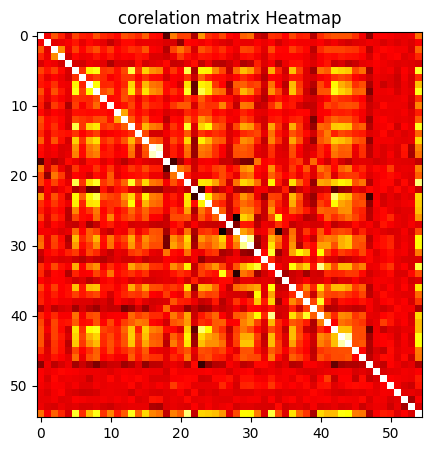

In [87]:
plt.figure(figsize=(8,5))
plt.imshow(main_df.corr(),cmap='hot')
plt.title("corelation matrix Heatmap")
plt.show()

## Visualizing Distribution

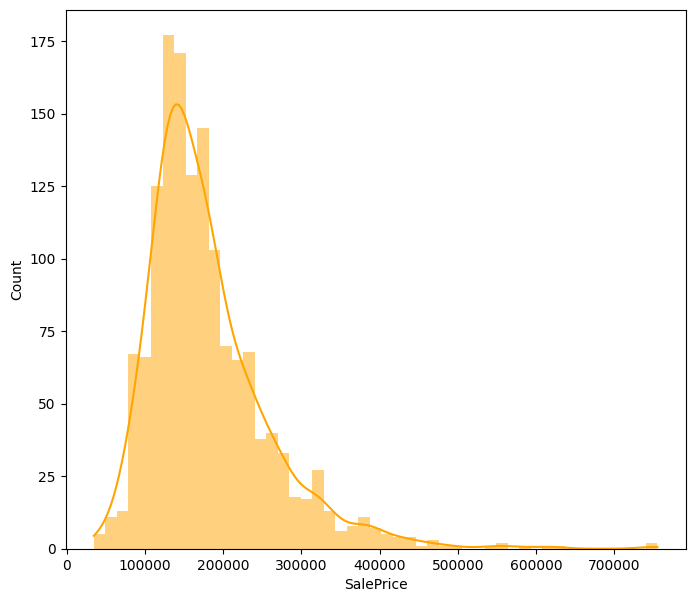

In [103]:
plt.figure(figsize=(8,7))
sns.histplot(main_df['SalePrice'], kde=True, fill=True, color='orange', edgecolor='none')
plt.show()

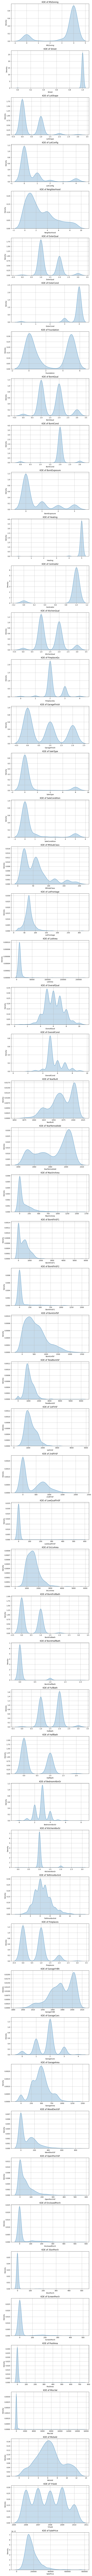

In [106]:

# Select only numeric columns
numeric_cols = main_df.select_dtypes(include='number').columns

# Create subplots - here, stacking vertically
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.kdeplot(main_df[col], fill=True, ax=axes[i])
    axes[i].set_title(f'KDE of {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## check value_counts of Pool Area and misval 

In [108]:
main_df['PoolArea'].value_counts()

PoolArea
0.0      1453
512.0       1
648.0       1
576.0       1
555.0       1
480.0       1
519.0       1
738.0       1
Name: count, dtype: int64

In [109]:
main_df['MiscVal'].value_counts()

MiscVal
0.0        1408
400.0        11
500.0         8
700.0         5
450.0         4
600.0         4
2000.0        4
1200.0        2
480.0         2
350.0         1
15500.0       1
800.0         1
3500.0        1
1300.0        1
54.0          1
620.0         1
560.0         1
1400.0        1
8300.0        1
1150.0        1
2500.0        1
Name: count, dtype: int64

## Outliers distribution

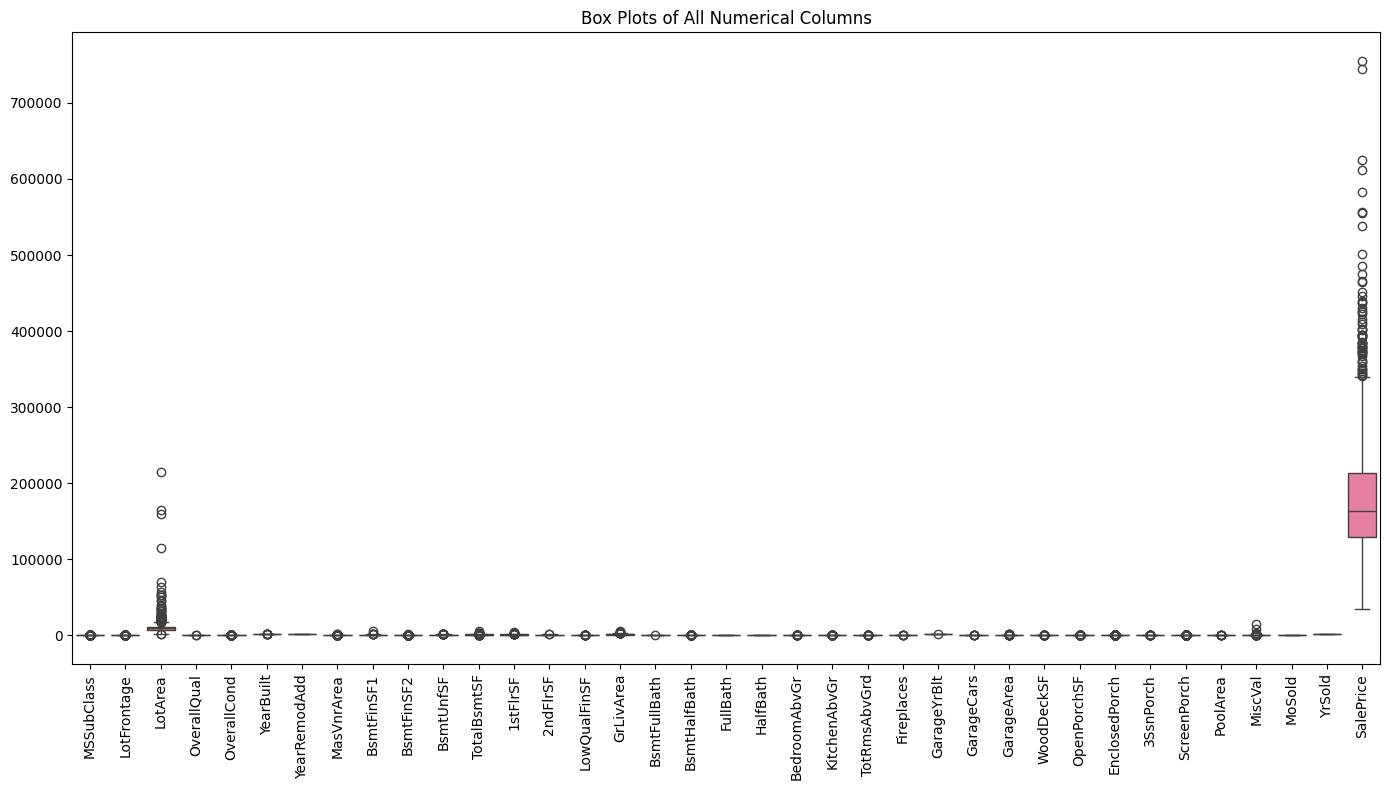

In [114]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=main_df.iloc[:,18:])
plt.title('Box Plots of All Numerical Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [115]:
# Handling outliers using IQR method
Q1 = main_df['LotArea'].quantile(0.25)
Q3 = main_df['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = main_df[(main_df['LotArea'] >= lower_bound) & (main_df['LotArea'] <= upper_bound)]

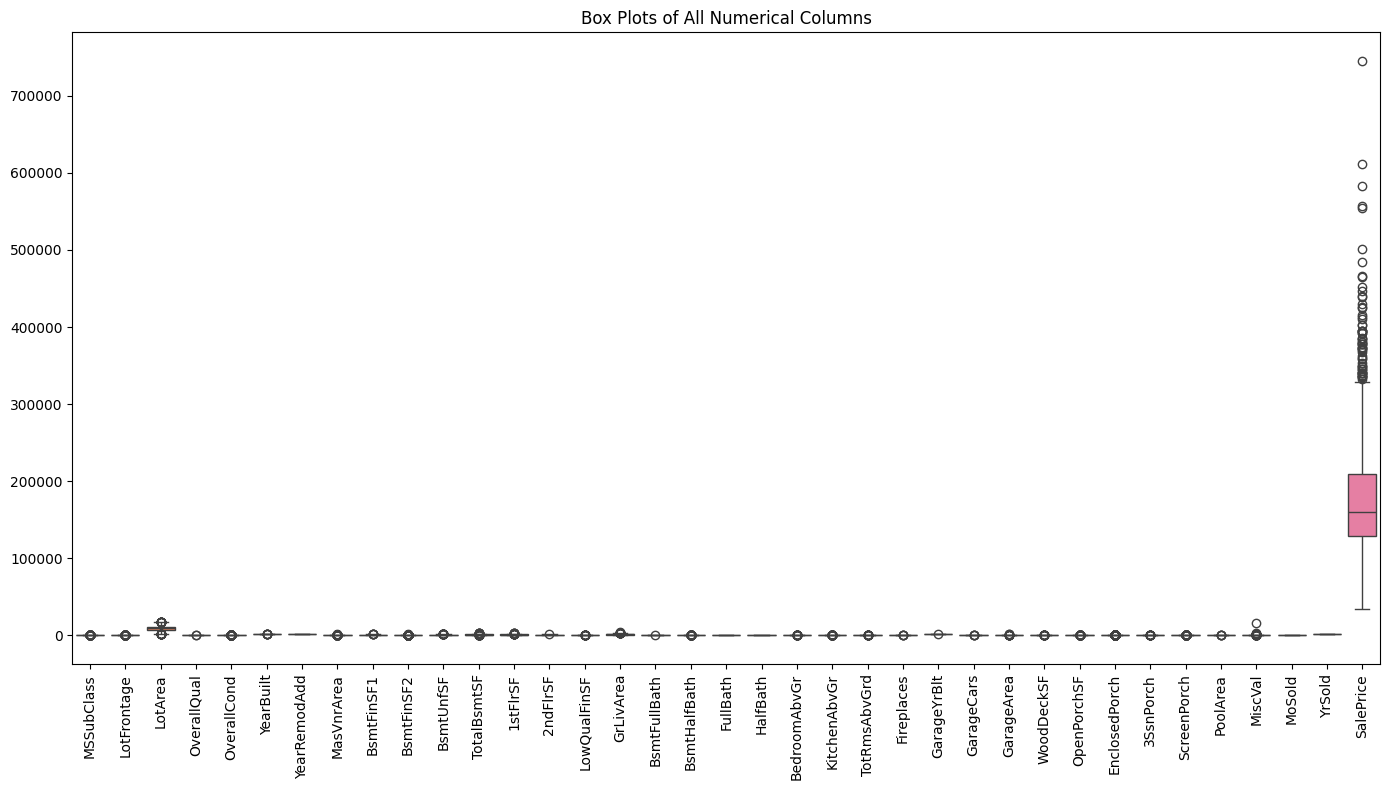

In [116]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered.iloc[:,18:])
plt.title('Box Plots of All Numerical Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### SalePrices are always high from these area measurements
----
#### Model Training
## Linear Regression

In [117]:
# Splitting our data
X = df_filtered.drop(columns='SalePrice')
y = df_filtered['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.8876146982466137

## RandomForest

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [130]:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.9098966134289271

## GradientBoosting

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [132]:
from sklearn.metrics import r2_score
y_pred = gbr.predict(X_test)
r2_score(y_test,y_pred)

0.9250295406833099

## XGBoost 

In [133]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [134]:
y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

0.904359717890604

## Let's train GradientBoosting Again by dropping poolArea col


In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gbr1 = GradientBoostingRegressor()
gbr1.fit(X_train.drop(columns=['PoolArea']),y_train)
y_pred = gbr1.predict(X_test.drop(columns=['PoolArea']))
r2_score(y_test,y_pred)

0.9287473423541164

In [157]:
X1_train = X_train.drop(columns=['PoolArea']).copy()
X1_test = X_test.drop(columns=['PoolArea']).copy()

## Voting Ensemble

In [144]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(
    estimators=[
        ('gbr', GradientBoostingRegressor(random_state=42)),
        ('rfe2', RandomForestRegressor(random_state=42)),
        ('XGB1', XGBRegressor(random_state=42))
    ]
)

voting_model.fit(X_train, y_train)

,estimators,"[('gbr', ...), ('rfe2', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1


In [145]:
y_pred = voting_model.predict(X_test)
r2_score(y_test,y_pred)

0.9227674307986152

## Stacking


In [149]:
from sklearn.ensemble import StackingRegressor
base_learner = [
    ('Rfr',RandomForestRegressor(random_state=42)),
    ('Gbr',GradientBoostingRegressor(random_state=42)),
    ('Gbr2',GradientBoostingRegressor(random_state=42))
]

final_estimator=XGBRegressor(random_state=42)


stacked = StackingRegressor(
    estimators=base_learner,
    final_estimator=final_estimator,
    passthrough=True
)

stacked.fit(X_train,y_train)

,estimators,"[('Rfr', ...), ('Gbr', ...), ...]"
,final_estimator,"XGBRegressor(...ree=None, ...)"
,cv,None
,n_jobs,None
,passthrough,True
,verbose,0
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [150]:
y_pred = stacked.predict(X_test)
r2_score(y_test,y_pred)

0.9278100800468918

## Let's combine both

In [179]:
from sklearn.ensemble import AdaBoostRegressor

In [185]:
base_learners = [
    ('rfr1',XGBRegressor(random_state=42)),
    ('gbr1',GradientBoostingRegressor(random_state=42)),
    ('rfr3',RandomForestRegressor(random_state=42)),
]

final_estimator = VotingRegressor(
    estimators=[
        ('gbr', GradientBoostingRegressor(random_state=42)),
        ('xgb2',XGBRegressor(random_state=42)),
        ('rfe', RandomForestRegressor(random_state=42)),
        ('lr',LinearRegression())
        
    ]
)

stack = StackingRegressor(estimators=base_learners,final_estimator=final_estimator,passthrough=True)

stack.fit(X1_train,y_train)

,estimators,"[('rfr1', ...), ('gbr1', ...), ...]"
,final_estimator,VotingRegress...egression())])
,cv,None
,n_jobs,None
,passthrough,True
,verbose,0
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None


In [186]:
y_pred = stack.predict(X1_test)
r2_score(y_test,y_pred)

0.934740942605832

In [ ]:
from sklearn.feature_selection import RFE

In [188]:
for i in range(53,20,-1):
    selector = RFE(GradientBoostingRegressor(random_state=42),n_features_to_select=i)
    selector.fit(X1_train,y_train)
    X1_train_sel = selector.transform(X1_train)
    X1_test_sel = selector.transform(X1_test)

    stack.fit(X1_train_sel,y_train)
    y_pred = stack.predict(X1_test_sel)
    print(r2_score(y_test,y_pred),'i=',i)

0.934740942605832 i= 53
0.9341760209183486 i= 52
0.9337512637409303 i= 51
0.9306801537607381 i= 50
0.9331756202335189 i= 49
0.9344237941455276 i= 48
0.9326394174548975 i= 47
0.9303640481533808 i= 46
0.9350374655657534 i= 45
0.9343534386117893 i= 44
0.933699294485095 i= 43
0.9306497883367473 i= 42
0.9353905305339417 i= 41
0.9316980949157819 i= 40
0.9324236493422234 i= 39
0.9331264452690063 i= 38
0.9335850362541767 i= 37
0.9300860560346221 i= 36
0.9328246364174143 i= 35
0.9320104093557446 i= 34
0.9345206479814445 i= 33
0.933333558924004 i= 32
0.9324588700350367 i= 31
0.9323670501282857 i= 30
0.9337580105685596 i= 29
0.9263569980792958 i= 28
0.9240433844948782 i= 27
0.9254376285785934 i= 26
0.9253671136826931 i= 25
0.9241414960654362 i= 24
0.9196124067232707 i= 23
0.918674680506896 i= 22
0.920213584469603 i= 21


## ***Best Scores***

In [189]:
selector = RFE(GradientBoostingRegressor(random_state=42),n_features_to_select=41)
selector.fit(X1_train,y_train)
X1_train_sel = selector.transform(X1_train)
X1_test_sel = selector.transform(X1_test)

stack.fit(X1_train_sel,y_train)
y_pred = stack.predict(X1_test_sel)
print(r2_score(y_test,y_pred))

0.9353905305339417


## ***Best Features***

In [192]:
selected_features = X1_train.columns[selector.support_]
print("Best columns selected by RFE:", selected_features)

Best columns selected by RFE: Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'SaleType', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'MoSold'],
      dtype='object')


----